# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

There are many features embedded in job descriptions. Is there any association betweeen the job description and salary? If so, what are the important features? 

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

#etc

#your info here
__author__ = "Linchen Deng"
__email__ = "linchen_deng@brown.edu"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_X = pd.read_csv("data/train_features.csv")
train_y = pd.read_csv("data/train_salaries.csv")
test_X = pd.read_csv("data/test_features.csv")

### ---- 3 Clean the data ----

In [3]:
# Take a look at the training data
train_X.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
print(train_X.shape, train_y.shape)
print(train_X.info(), train_y.info())

(1000000, 8) (1000000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None None


In [5]:
# There is no NAs in the training data 
train_X.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [6]:
# There is no duplicated row in the training data
train_X[train_X.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis


In [7]:
# Check non-positive salaries
wrong_salary_rows = train_y["salary"]<=0
train_y[wrong_salary_rows]

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [8]:
# remove rows with zero salaries in the training data
train_X.drop(train_X[wrong_salary_rows].index, inplace=True)
train_y.drop(train_y[wrong_salary_rows].index, inplace=True)

### ---- 4 Explore the data (EDA) ----

#### People in this data set on average have 12 years of experience and work 50 miles from metropolis cities.

,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000
mean,11.992407,49.529381
std,7.212390,28.877721
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


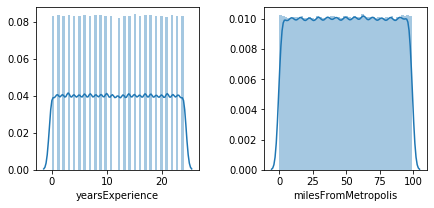

In [46]:
f, axes = plt.subplots(1,2,figsize=(7,3))
plt.subplots_adjust(wspace=0.4)
sns.distplot(train_X.yearsExperience, ax=axes[0])
sns.distplot(train_X.milesFromMetropolis, ax=axes[1])
train_X.describe()

#### Distribution of levels within each categorical variable

Text(0.5, 1.0, 'industry')

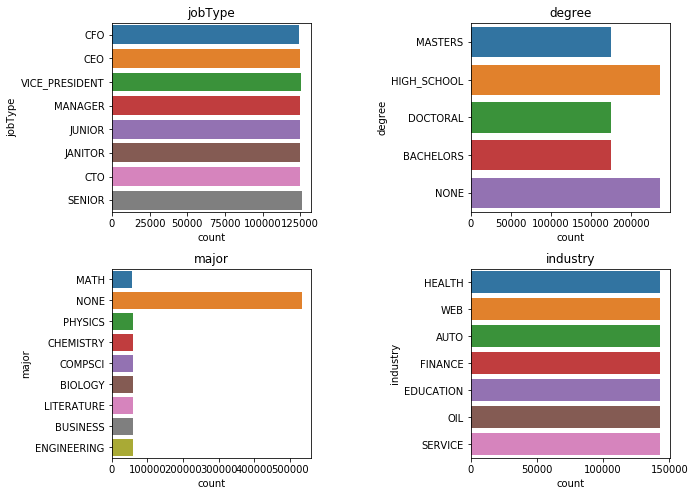

In [30]:
f, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.3)
sns.countplot(y="jobType", data=train_X, ax=axes[0, 0]).set_title('jobType')
sns.countplot(y="degree", data=train_X, ax=axes[0, 1]).set_title('degree')
sns.countplot(y="major", data=train_X, ax=axes[1, 0]).set_title('major')
sns.countplot(y="industry", data=train_X, ax=axes[1, 1]).set_title('industry')

#### The average salary is 116K, ranging from 17K to 301K.

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

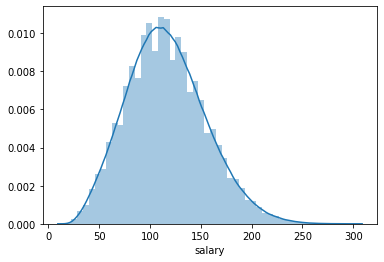

In [50]:
sns.distplot(train_y.salary)
train_y.salary.describe()

### Explore Relationships between features and salary

In [54]:
train_combined = pd.merge(left=train_X,right=train_y, left_on='jobId', right_on='jobId')

In [55]:
def barplot_categorical(data, variable_x):
    ordered_category = data.groupby(variable_x).salary.mean().sort_values(ascending=False).index
    ax = sns.barplot(x="salary",y=variable_x,data=data, order=ordered_category)
    return ordered_category

#### Job Type and Salary
On average, CEO makes more salary than CTO and CFO; Manager makes more than senior, which is more than junior; Janitor makes the least.

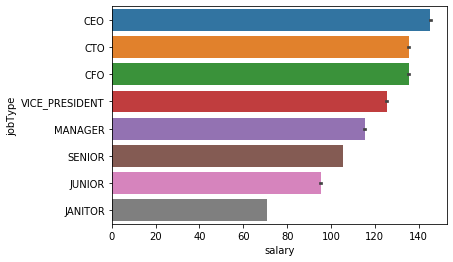

In [56]:
jobType_order = barplot_categorical(train_combined, "jobType")

#### Degree and Salary
On average, phD > Masters > Bachelors > High School > None(categorized as below high school)
The salary gap between a high school and a Bachelor's degree is 4 times higher than the difference either between Bachelor's and Master's or Master's and phD.  

degree
BACHELORS      125.454663
DOCTORAL       135.490979
HIGH_SCHOOL    101.921085
MASTERS        130.505647
NONE            98.176882
Name: salary, dtype: float64

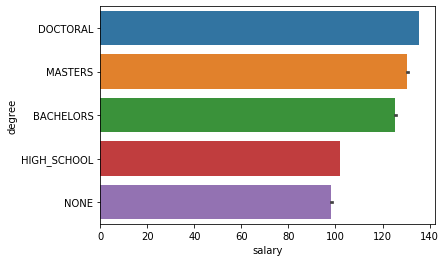

In [59]:
degree_order = barplot_categorical(train_combined, "degree")
train_combined.groupby("degree").salary.mean()

#### Major and Salary
Engineering, business, math, computer science (Practical and industry-related majors) have higher salaries than physics, chemistry, biology, literature (Basic sciences and Art majors). 

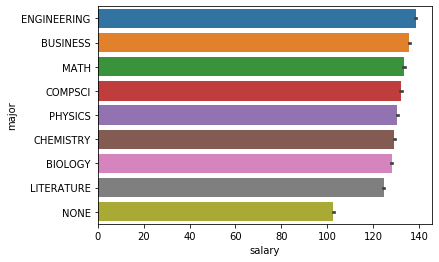

In [60]:
major_order = barplot_categorical(train_combined, "major")

#### Industry and Salary
Oil and finance industry have higher salary than web, health, auto industry, higher than service and education industry.

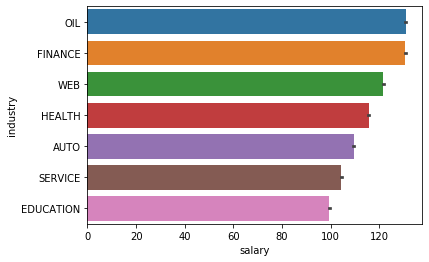

In [61]:
industry_order = barplot_categorical(train_combined, "industry")

#### Years experience and salary
On average, more years of experience is correlated with higher salary.

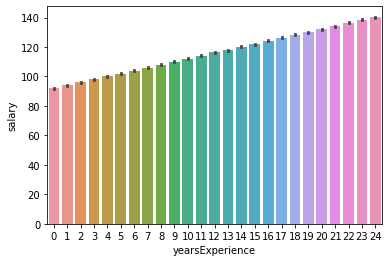

In [62]:
sns.barplot(x="yearsExperience",y="salary",data=train_combined)

#### Miles from metropolis and salary
The further the job from the metropolis, the lower the salary.

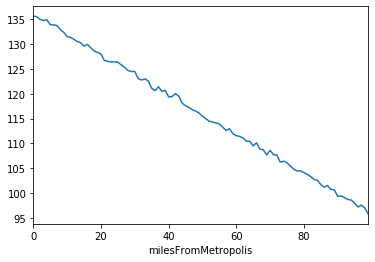

In [63]:
train_combined.groupby("milesFromMetropolis").salary.mean().plot()

In [ ]:
# Preprocessing: map categorical variables to ordinal numbers based on group average salary. 
# The higher the average salary, the larger the value is matched with the specific level. 
# For example, CEO=8 > Janitor=1
replace_map = {"jobType":{x:i+1 for i,x in enumerate(jobType_order[::-1])},
              "degree":{x:i+1 for i,x in enumerate(degree_order[::-1])},
              "industry":{x:i+1 for i,x in enumerate(industry_order[::-1])},
              "major":{x:i+1 for i,x in enumerate(major_order[::-1])}}
print(replace_map["jobType"])
train_combined.replace(replace_map, inplace=True)

### Correlation between features
Degree and major are positively correlated with correlation coefficient 0.639. 
Degree and jobType are positively correlated with correlation coefficient 0.202.
Major and jobType are positively correlated with correlation coefficient 0.167.

Salary is correlated with jobType(0.579), degree(0.384044),yearsExperience(0.375013), 	major(0.346213), industry(0.293894), milesFromMetropolis(-0.297686).

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,1.000000,0.201779,0.167442,0.002146,0.001061,-0.000212,0.578922
degree,0.201779,1.000000,0.638639,0.001305,0.000217,0.001785,0.384044
major,0.167442,0.638639,1.000000,-0.000168,-0.000114,0.001128,0.346213
industry,0.002146,0.001305,-0.000168,1.000000,0.000624,-0.001158,0.293894
yearsExperience,0.001061,0.000217,-0.000114,0.000624,1.000000,0.000672,0.375013
milesFromMetropolis,-0.000212,0.001785,0.001128,-0.001158,0.000672,1.000000,-0.297686
salary,0.578922,0.384044,0.346213,0.293894,0.375013,-0.297686,1.000000


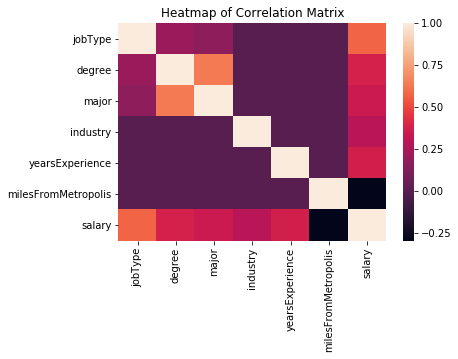

In [67]:
# Correlation
corr = train_combined.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

### ---- 5 Establish a baseline ----

In [70]:
train_X_new = train_combined[['jobType','degree','major','industry',
                              'yearsExperience','milesFromMetropolis']]
train_y_new = train_combined['salary'].astype("float64")

#### BaseLine model: predicting salary by jobType, since jobType is most correlated with salary.
MSE with 5-fold cross validation: 963.9

In [71]:
# Metric: MSE 
# "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation
class avg_salary_by_jobType:
    def __init__(self, data):
        self.avg_salary = data.groupby("jobType").salary.mean()
        self.rule = {i+1:x for i,x in enumerate(self.avg_salary)}
    def predict(self, test_X):
        self.prediction = test_X.jobType.map(lambda x:self.rule[x])
        return self.prediction

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=100)
MSE_baseline = 0
for train, test in kf.split(train_X_new):
    train_fold = pd.concat([train_X_new.iloc[train,:], train_y_new[train]], axis=1, ignore_index=False)
    jobType_model = avg_salary_by_jobType(train_fold)
    prediction = jobType_model.predict(train_X_new.iloc[test,:])
    diff = prediction - train_y_new[test]
    MSE_baseline += diff.pow(2).sum()/len(test)
print(MSE_baseline/5)

963.9499897952683


### ---- 6 Hypothesize solution to Baseline----

#### Model 1:  Linear Regression without interaction
MSE: 397.1

In [92]:
from sklearn.linear_model import LinearRegression
MSE_lr = 0
for train, test in kf.split(train_X_new):
    lr_model = LinearRegression(normalize=True)
    lr_model.fit(train_X_new.loc[train,:], train_y_new[train])
    prediction = lr_model.predict(train_X_new.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_lr += diff.pow(2).sum()/len(test)
print(lr_model.score(train_X_new.loc[test,:], train_y_new[test]))
print(lr_model.coef_)
print(lr_model.intercept_)
print(MSE_lr/5)

0.735627961024586
[ 8.7233478   5.22311538  1.94488133  5.66009929  2.01073299 -0.39959442]
29.138184226226244
397.0965858974524


#### Model 2:  Linear Regression with interaction between degree, major, jobType
Since degree, major, jobType are not entirely independent, I consider including interaction terms to see if it makes a difference. There is little increase in peformance. From the EDA, almost all features are associated with salary, so I will keep all of them and try other models.
MSE: 396.4

In [93]:
train_X_inter = train_X_new.copy()
train_X_inter['degreeMajor'] = train_X_inter['degree'].mul(train_X_inter['major'])
train_X_inter['jobTypeMajor'] = train_X_inter['jobType'].mul(train_X_inter['major'])
train_X_inter['degreejobType'] = train_X_inter['degree'].mul(train_X_inter['jobType'])
MSE_lr_inter = 0
for train, test in kf.split(train_X_inter):
    lr_model = LinearRegression(normalize=True)
    lr_model.fit(train_X_inter.loc[train,:], train_y_new[train])
    prediction = lr_model.predict(train_X_inter.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_lr_inter += diff.pow(2).sum()/len(test)
print(lr_model.score(train_X_inter.loc[test,:], train_y_new[test]))
print(lr_model.coef_)
print(lr_model.intercept_)
print(MSE_lr_inter/5)

0.736000463312447
[ 9.27311944  5.78443087  2.53044199  5.65979658  2.0105579  -0.39964892
 -0.03212314 -0.09627653 -0.11522138]
26.614669133739753
396.4067719855261


#### Model 3: Regression Tree
MSE: 692.7, better than the baseline, but worse than the linear regression model.

In [74]:
from sklearn.tree import DecisionTreeRegressor 
MSE_DT = 0
for train, test in kf.split(train_X_new):
    DTR = DecisionTreeRegressor()
    DTR.fit(train_X_new.loc[train,:], train_y_new[train])
    prediction = DTR.predict(train_X_new.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_DT += diff.pow(2).sum()/len(test)
print(MSE_DT/5)

692.6920704116507


#### Model 4 Gradient Boosting Regressor
MSE: 366.34   lr=0.05, n=150, max_depth=4, 3.3m/fold

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
MSE_GBR = 0
i=1
for train, test in kf.split(train_X_new):
    print("Cross Validation fold: ", i)
    i += 1
    GBR = GradientBoostingRegressor(loss="lad",learning_rate=0.05, n_estimators=150,
                                    min_samples_split=2, min_samples_leaf=1,
                                    max_depth=4, verbose=1)
    GBR.fit(train_X_new.loc[train,:], train_y_new[train])
    prediction = GBR.predict(train_X_new.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_GBR += diff.pow(2).sum()/len(test)
print(MSE_GBR/5)

Cross Validation fold:  1
      Iter       Train Loss   Remaining Time 
         1          30.1063            3.30m
         2          29.2834            3.26m
         3          28.5294            3.24m
         4          27.8136            3.23m
         5          27.1516            3.20m
         6          26.5286            3.16m
         7          25.9538            3.15m
         8          25.4187            3.11m
         9          24.9071            3.08m
        10          24.4321            3.07m
        20          20.8958            2.82m
        30          18.8401            2.59m
        40          17.6114            2.48m
        50          16.8389            2.23m
        60          16.3454            2.01m
        70          16.0292            1.78m
        80          15.8269            1.55m
        90          15.6927            1.32m
       100          15.6070            1.10m
Cross Validation fold:  2
      Iter       Train Loss   Remaining Time 
 

#### Model 5 Light GBM
MSE: 357.3, default
527, dart
356.537, num_leave=70
356.38, num_leave=70, n_est=150
355.87, {'learning_rate': 0.05,
 'min_child_samples': 30,
  'min_child_weight': 0.001,
  'min_split_gain': 0,
  'n_estimators': 250,
  'num_leaves': 71,
  'reg_lambda': 0.001}


In [89]:
# Parameter Tuning
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

gsc = GridSearchCV(
        estimator=LGBMRegressor(),
        param_grid={
            'num_leaves': [71, 81, 91, 101],
            'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1],
            'n_estimators': [100, 150, 200, 250],
            'min_child_samples': [10,20,30],
            'min_split_gain': [0, 1e-3],
            'min_child_weight': [1e-3, 1e-4],
            'reg_lambda': [0,1e-1,1e-3]
        },
        cv=2, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)



# gsc = GridSearchCV(
#         estimator=LGBMRegressor(),
#         param_grid={
#             'num_leaves': [31, 41, 51, 61, 71, 81, 91, 101],
#             'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
#             'n_estimators': [100, 150, 200, 250],
#             'min_child_samples': [10,20,30,50,75,100],
#             'min_split_gain': [0, 0.01,1e-3],
#             'min_child_weight': [1e-2, 1e-3, 1e-4, 1e-5],
#             'reg_lambda': [0,1e-1,1e-2,1e-3]
#         },
#         cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)


grid_result = gsc.fit(train_X_new, train_y_new)
best_params = grid_result.best_params_
# {'learning_rate': 0.05,
#  'min_child_samples': 30,
#  'min_child_weight': 0.001,
#  'min_split_gain': 0,
#  'n_estimators': 250,
#  'num_leaves': 71,
#  'reg_lambda': 0.001}

Fitting 2 folds for each of 2880 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 67.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 101.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 144.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 191.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 251.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 321.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 388.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 451.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 514.2min finished


In [90]:
best_params

{'learning_rate': 0.05,
 'min_child_samples': 30,
 'min_child_weight': 0.001,
 'min_split_gain': 0,
 'n_estimators': 250,
 'num_leaves': 71,
 'reg_lambda': 0.001}

In [91]:
from lightgbm import LGBMRegressor
MSE_lgbm = 0
i=1
for train, test in kf.split(train_X_new):
    print("Cross Validation fold: ", i)
    i += 1
    LGBM = LGBMRegressor(boosting_type="gbdt",num_leaves=71, max_depth=-1, 
                         learning_rate=0.05, n_estimators=250, subsample_for_bin=200000, 
                         objective=None, class_weight=None, min_split_gain=0.0, 
                         min_child_weight=0.001, min_child_samples=30, subsample=1.0, 
                         subsample_freq=0, colsample_bytree=1.0, 
                         reg_alpha=0.0, reg_lambda=0.001, random_state=None)
    LGBM.fit(train_X_new.loc[train,:], train_y_new[train])
    prediction = LGBM.predict(train_X_new.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_lgbm += diff.pow(2).sum()/len(test)
print(MSE_lgbm/5)

Cross Validation fold:  1
Cross Validation fold:  2
Cross Validation fold:  3
Cross Validation fold:  4
Cross Validation fold:  5
355.8712635069136


#### Model 6 XGboost
MSE: 366.6, default

In [81]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=train_X_new,label=train_y_new)
MSE_xgb = 0
i=1
for train, test in kf.split(train_X_new):
    print("Cross Validation fold: ", i)
    i += 1
    XGB = xgb.XGBRegressor()
    XGB.fit(train_X_new.loc[train,:], train_y_new[train])
    prediction = XGB.predict(train_X_new.loc[test,:])
    diff = prediction - train_y_new[test]
    MSE_xgb += diff.pow(2).sum()/len(test)
print(MSE_xgb/5)

C:\Users\19109\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Cross Validation fold:  1
[21:03:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation fold:  2
[21:04:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation fold:  3
[21:04:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation fold:  4
[21:05:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Validation fold:  5
[21:06:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
366.5710160280658


## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data